# CitiBike Ridership Trends - MBA Data project 2017


### Sarah Love

### Tefiro Kituuka Serunjogi

This project endeavors to understand usership trends amongst Citi Bike riders in New York City.

CitiBike collects cumulative data about its riders, including the number of rentals each day, the total distance per ride (measured as distance between pick-up station and drop-off station), and the number of long-term rentals on any given day. Our analysis examines trends among the number of rentals by day and by month, as well as average distances. With these trends, we can better understand how and when people use CitiBike. This information has the potential to make a huge impact on CitiBike's advertising and marketing campaigns, as well as its internal operations.

In [79]:
import sys                             # system module 
import pandas as pd                    # data package
import matplotlib as mpl               # graphics package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import numpy as np                     # foundation for pandas 
import csv                             # package for converting csv
from collections import defaultdict    # will be used to convert dates
import seaborn as sns                  # advanced graphics
import urllib.request                  # package to read url

%matplotlib inline                     

First, we must import the data from CitiBike's website. The data accessed throught the **'Get the data'** link at the bottom left corner of the following page http://datawrapper.dwcdn.net/33zqP/6/. This data is updated in near-real-time. When we run our anlysis, data available was from January 1, 2017, through March 31, 2017. Due to the character length of the link address for the data file, it is not redable directly by a *.read_csv()* function in Python and so we use the *urllib.request* functionality as shown below to access the source website directly through python.

In [80]:
url = "data:application/octet-stream;charset=utf-8,Date%2CTrips%20over%20the%20past%2024-hours%20(midnight%20to%2011%3A59pm)%2CMiles%20traveled%20today%20(midnight%20to%2011%3A59%20pm)%2CTotal%20Annual%20Members%20(All%20Time)%2C24-Hour%20Passes%20Purchased%20(midnight%20to%2011%3A59%20pm)%2C3-Day%20Passes%20Purchased%20(midnight%20to%2011%3A59%20pm)%0A1%2F1%2F17%2C16009%2C50746%2C206623%2C1161%2C16%0A1%2F2%2F17%2C8918%2C21394%2C206672%2C127%2C10%0A1%2F3%2F17%2C14187%2C25058%2C206724%2C40%2C12%0A1%2F4%2F17%2C34006%2C69445%2C206774%2C448%2C23%0A1%2F5%2F17%2C28382%2C52401%2C206840%2C197%2C9%0A1%2F6%2F17%2C24173%2C48939%2C206873%2C152%2C11%0A1%2F7%2F17%2C4425%2C23556%2C206884%2C17%2C4%0A1%2F8%2F17%2C6416%2C22756%2C206897%2C21%2C2%0A1%2F9%2F17%2C15852%2C35069%2C206922%2C28%2C2%0A1%2F10%2F17%2C23218%2C46074%2C206943%2C61%2C10%0A1%2F11%2F17%2C32400%2C62766%2C206967%2C195%2C22%0A1%2F12%2F17%2C39766%2C84313%2C207003%2C435%2C22%0A1%2F13%2F17%2C33602%2C75661%2C207039%2C361%2C22%0A1%2F14%2F17%2C13819%2C43090%2C207067%2C227%2C21%0A1%2F15%2F17%2C17383%2C50738%2C207100%2C454%2C13%0A1%2F16%2F17%2C24106%2C51613%2C207141%2C410%2C23%0A1%2F17%2F17%2C18643%2C40692%2C207176%2C61%2C10%0A1%2F18%2F17%2C30847%2C57814%2C207202%2C134%2C12%0A1%2F19%2F17%2C36543%2C71690%2C207239%2C351%2C17%0A1%2F20%2F17%2C26736%2C55837%2C207263%2C172%2C14%0A1%2F21%2F17%2C26610%2C64662%2C207310%2C901%2C24%0A1%2F22%2F17%2C20523%2C49368%2C207340%2C500%2C12%0A1%2F23%2F17%2C15816%2C37551%2C207370%2C47%2C15%0A1%2F24%2F17%2C13165%2C35067%2C207385%2C24%2C3%0A1%2F25%2F17%2C36918%2C70769%2C207423%2C274%2C20%0A1%2F26%2F17%2C32991%2C63675%2C207470%2C205%2C19%0A1%2F27%2F17%2C32385%2C70104%2C207508%2C211%2C18%0A1%2F28%2F17%2C21300%2C53951%2C207534%2C381%2C14%0A1%2F29%2F17%2C22522%2C62773%2C207588%2C540%2C19%0A1%2F30%2F17%2C29607%2C59796%2C207641%2C157%2C23%0A1%2F31%2F17%2C25163%2C48787%2C207671%2C54%2C13%0A2%2F1%2F17%2C35198%2C77344%2C207712%2C180%2C11%0A2%2F2%2F17%2C34511%2C70595%2C207756%2C193%2C21%0A2%2F3%2F17%2C29622%2C64375%2C207784%2C169%2C25%0A2%2F4%2F17%2C19204%2C45120%2C207819%2C366%2C8%0A2%2F5%2F17%2C20059%2C50532%2C207845%2C310%2C15%0A2%2F6%2F17%2C33405%2C72546%2C207884%2C272%2C33%0A2%2F7%2F17%2C23047%2C57685%2C207914%2C48%2C13%0A2%2F8%2F17%2C40416%2C90384%2C207962%2C448%2C26%0A2%2F9%2F17%2C0%2C0%2C207969%2C0%2C0%0A2%2F10%2F17%2C1995%2C8308%2C207981%2C11%2C0%0A2%2F11%2F17%2C8958%2C26272%2C207988%2C159%2C3%0A2%2F12%2F17%2C5800%2C26468%2C208005%2C24%2C3%0A2%2F13%2F17%2C23851%2C58682%2C208028%2C68%2C14%0A2%2F14%2F17%2C29656%2C77900%2C208050%2C152%2C11%0A2%2F15%2F17%2C32046%2C72348%2C208087%2C151%2C23%0A2%2F16%2F17%2C29116%2C63479%2C208112%2C98%2C9%0A2%2F17%2F17%2C28730%2C67472%2C208148%2C222%2C27%0A2%2F18%2F17%2C30569%2C99111%2C208205%2C1896%2C79%0A2%2F19%2F17%2C36962%2C125000%2C208290%2C3450%2C49%0A2%2F20%2F17%2C32286%2C91400%2C208371%2C1355%2C46%0A2%2F21%2F17%2C32637%2C84708%2C208444%2C292%2C37%0A2%2F22%2F17%2C38111%2C90486%2C208519%2C399%2C25%0A2%2F23%2F17%2C42335%2C98392%2C208580%2C752%2C60%0A2%2F24%2F17%2C46946%2C117022%2C208685%2C1400%2C69%0A2%2F25%2F17%2C33342%2C104309%2C208803%2C1870%2C38%0A2%2F26%2F17%2C24713%2C75196%2C208880%2C771%2C21%0A2%2F27%2F17%2C35975%2C79961%2C208946%2C348%2C28%0A2%2F28%2F17%2C41719%2C92669%2C209027%2C443%2C43%0A3%2F1%2F2017%2C40487%2C85690%2C209136%2C363%2C33%0A3%2F2%2F2017%2C35627%2C73635%2C209214%2C287%2C24%0A3%2F3%2F2017%2C31042%2C68544%2C209274%2C261%2C29%0A3%2F4%2F2017%2C15645%2C43108%2C209307%2C230%2C10%0A3%2F5%2F2017%2C15919%2C50924%2C209353%2C275%2C12%0A3%2F6%2F2017%2C32456%2C72517%2C209438%2C301%2C25%0A3%2F7%2F2017%2C29605%2C63538%2C209486%2C166%2C21%0A3%2F8%2F2017%2C43339%2C101349%2C209554%2C621%2C36%0A3%2F9%2F2017%2C45070%2C99193%2C209625%2C688%2C22%0A3%2F10%2F2017%2C18394%2C41929%2C209654%2C79%2C13%0A3%2F11%2F2017%2C15185%2C48379%2C209676%2C154%2C21%0A3%2F12%2F2017%2C13437%2C38128%2C209693%2C149%2C5%0A3%2F13%2F2017%2C27343%2C58708%2C209721%2C180%2C11%0A3%2F14%2F2017%2C0%2C0%2C209738%2C0%2C0%0A3%2F15%2F2017%2C0%2C0%2C209757%2C0%2C0%0A3%2F16%2F2017%2C0%2C0%2C209769%2C0%2C0%0A3%2F17%2F2017%2C7096%2C25327%2C209791%2C132%2C12%0A3%2F18%2F2017%2C4105%2C17356%2C209813%2C79%2C6%0A3%2F19%2F2017%2C10550%2C33344%2C209845%2C304%2C10%0A3%2F20%2F2017%2C27285%2C60121%2C209898%2C266%2C19%0A3%2F21%2F2017%2C36732%2C77937%2C209966%2C420%2C36%0A3%2F22%2F2017%2C26805%2C55434%2C210014%2C120%2C8%0A3%2F23%2F2017%2C29881%2C74320%2C210053%2C246%2C17%0A3%2F24%2F2017%2C34009%2C82641%2C210094%2C436%2C27%0A3%2F25%2F2017%2C29645%2C86293%2C210161%2C1540%2C44%0A3%2F26%2F2017%2C19893%2C55139%2C210212%2C483%2C17%0A3%2F27%2F2017%2C26288%2C59584%2C210279%2C293%2C29%0A3%2F28%2F2017%2C21463%2C45798%2C210338%2C75%2C9%0A3%2F29%2F2017%2C42398%2C91378%2C210444%2C762%2C86%0A3%2F30%2F2017%2C39732%2C90917%2C210504%2C601%2C47%0A3%2F31%2F2017%2C6943%2C23459%2C210549%2C19%2C4"
data_file = urllib.request.urlopen(url)   # this code allows python to access the information directly from the source website

CitiBike = pd.read_csv(data_file) 
print ('Variable dtypes:\n', CitiBike.dtypes)
CitiBike.head()


Variable dtypes:
 Date                                                  object
Trips over the past 24-hours (midnight to 11:59pm)     int64
Miles traveled today (midnight to 11:59 pm)            int64
Total Annual Members (All Time)                        int64
24-Hour Passes Purchased (midnight to 11:59 pm)        int64
3-Day Passes Purchased (midnight to 11:59 pm)          int64
dtype: object


,Date,Trips over the past 24-hours (midnight to 11:59pm),Miles traveled today (midnight to 11:59 pm),Total Annual Members (All Time),24-Hour Passes Purchased (midnight to 11:59 pm),3-Day Passes Purchased (midnight to 11:59 pm)
0,1/1/17,16009,50746,206623,1161,16
1,1/2/17,8918,21394,206672,127,10
2,1/3/17,14187,25058,206724,40,12
3,1/4/17,34006,69445,206774,448,23
4,1/5/17,28382,52401,206840,197,9


We see that this data is has much more information than we need. For example, it includes total annual membership, which we do not need for this analysis. Thus, we have removed this column to prioritize the data that will most impact daily and monthly usership.

In [81]:
CitiBike.drop(CitiBike.columns[[3,4,5]], axis = 1, inplace = True)
CitiBike.head()

,Date,Trips over the past 24-hours (midnight to 11:59pm),Miles traveled today (midnight to 11:59 pm)
0,1/1/17,16009,50746
1,1/2/17,8918,21394
2,1/3/17,14187,25058
3,1/4/17,34006,69445
4,1/5/17,28382,52401


In order to manipulate and sort the data based on day of the week and month, we must convert the date information from a .csv format to python datetime format.

In [82]:
CitiBike['Date'] =  pd.to_datetime(CitiBike['Date'])
CitiBike.head ()

,Date,Trips over the past 24-hours (midnight to 11:59pm),Miles traveled today (midnight to 11:59 pm)
0,2017-01-01,16009,50746
1,2017-01-02,8918,21394
2,2017-01-03,14187,25058
3,2017-01-04,34006,69445
4,2017-01-05,28382,52401


In [83]:
CitiBike.dtypes

Date                                                  datetime64[ns]
Trips over the past 24-hours (midnight to 11:59pm)             int64
Miles traveled today (midnight to 11:59 pm)                    int64
dtype: object

Now that Python recognizes the data in the Date column as calendar dates, we can add a column to classify each data point by day of the week and by month. This will ultimately allow us to compare usage on Monday vs. Tuesday, e.g., or January vs. February.

In [84]:
CitiBike['Day of Week'] = CitiBike['Date'].dt.weekday_name
CitiBike.head()

,Date,Trips over the past 24-hours (midnight to 11:59pm),Miles traveled today (midnight to 11:59 pm),Day of Week
0,2017-01-01,16009,50746,Sunday
1,2017-01-02,8918,21394,Monday
2,2017-01-03,14187,25058,Tuesday
3,2017-01-04,34006,69445,Wednesday
4,2017-01-05,28382,52401,Thursday


In [85]:
CitiBike['Month'] = CitiBike['Date'].dt.month
CitiBike.head()

,Date,Trips over the past 24-hours (midnight to 11:59pm),Miles traveled today (midnight to 11:59 pm),Day of Week,Month
0,2017-01-01,16009,50746,Sunday,1
1,2017-01-02,8918,21394,Monday,1
2,2017-01-03,14187,25058,Tuesday,1
3,2017-01-04,34006,69445,Wednesday,1
4,2017-01-05,28382,52401,Thursday,1


In order to get a sense for how much data we are working with, we need to pull the size and shape. This is relevant to see how many data points we have.

In [86]:
print ("The number of rows and columns are ", CitiBike.shape, "respectively")

The number of rows and columns are  (90, 5) respectively


We now have all the useful data columns, but the index column needs to be replaced. We want to analyze this data by date, so we need to make the date column the index.


In [87]:
CitiBike = CitiBike.set_index ('Date')
CitiBike.head()


,Trips over the past 24-hours (midnight to 11:59pm),Miles traveled today (midnight to 11:59 pm),Day of Week,Month
Date,,,,
2017-01-01,16009,50746,Sunday,1
2017-01-02,8918,21394,Monday,1
2017-01-03,14187,25058,Tuesday,1
2017-01-04,34006,69445,Wednesday,1
2017-01-05,28382,52401,Thursday,1


Next, we will retitle each column so that it's easier to understand what we're looking at.

In [88]:
titles = ['Total Trips', 'Total Miles', 'Day of Week', 'Month']
CitiBike.columns = titles
CitiBike.head()

,Total Trips,Total Miles,Day of Week,Month
Date,,,,
2017-01-01,16009,50746,Sunday,1
2017-01-02,8918,21394,Monday,1
2017-01-03,14187,25058,Tuesday,1
2017-01-04,34006,69445,Wednesday,1
2017-01-05,28382,52401,Thursday,1


To begin our analysis, we will add a column that shows the average mileage per trip each day. This can be done using a formula that divides the total miles for each day by the number of corresponding trips for each day, to derive an average trip length for each day.

In [89]:
CitiBike['Average Miles per Trip'] = CitiBike['Total Miles'] / CitiBike['Total Trips']
CitiBike.head()

,Total Trips,Total Miles,Day of Week,Month,Average Miles per Trip
Date,,,,,
2017-01-01,16009,50746,Sunday,1,3.169842
2017-01-02,8918,21394,Monday,1,2.398968
2017-01-03,14187,25058,Tuesday,1,1.766265
2017-01-04,34006,69445,Wednesday,1,2.042140
2017-01-05,28382,52401,Thursday,1,1.846276


In [90]:
CitiBike.shape

(90, 5)

To finalize the daily average comparisons, we need to create individual dataframes for each day of the week.

In [91]:
CitiBike [CitiBike['Day of Week'] == 'Sunday']
CitiBike [CitiBike['Day of Week'] == 'Monday']
CitiBike [CitiBike['Day of Week'] == 'Tuesday']
CitiBike [CitiBike['Day of Week'] == 'Wednesday']
CitiBike [CitiBike['Day of Week'] == 'Thursday']
CitiBike [CitiBike['Day of Week'] == 'Friday']
CitiBike [CitiBike['Day of Week'] == 'Saturday']
CitiBike [CitiBike['Month'] == 1]
CitiBike [CitiBike['Month'] == 2].head ()


,Total Trips,Total Miles,Day of Week,Month,Average Miles per Trip
Date,,,,,
2017-02-01,35198,77344,Wednesday,2,2.197398
2017-02-02,34511,70595,Thursday,2,2.045580
2017-02-03,29622,64375,Friday,2,2.173216
2017-02-04,19204,45120,Saturday,2,2.349511
2017-02-05,20059,50532,Sunday,2,2.519168


Now that we have individual dataframes for each day of the week, we can create larger dataframes for week days and weekends.

In [92]:
Weekend_List = ['Saturday', 'Sunday']
Weekday_List = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
CitiBike [CitiBike ['Day of Week'].isin (Weekend_List)].head ()

,Total Trips,Total Miles,Day of Week,Month,Average Miles per Trip
Date,,,,,
2017-01-01,16009,50746,Sunday,1,3.169842
2017-01-07,4425,23556,Saturday,1,5.323390
2017-01-08,6416,22756,Sunday,1,3.546758
2017-01-14,13819,43090,Saturday,1,3.118171
2017-01-15,17383,50738,Sunday,1,2.918829


In [93]:
CitiBike [CitiBike ['Day of Week'].isin (Weekday_List)].head ()

,Total Trips,Total Miles,Day of Week,Month,Average Miles per Trip
Date,,,,,
2017-01-02,8918,21394,Monday,1,2.398968
2017-01-03,14187,25058,Tuesday,1,1.766265
2017-01-04,34006,69445,Wednesday,1,2.042140
2017-01-05,28382,52401,Thursday,1,1.846276
2017-01-06,24173,48939,Friday,1,2.024532


Now that we have these dataframes compiled, we can start to pull some insights. For instance, we can calculate the average number of miles a rider travels on a weekday vs. a weekend.

In [94]:
Weekend_Chart = CitiBike [CitiBike ['Day of Week'].isin (Weekend_List)]
Weekend_Average = Weekend_Chart[['Average Miles per Trip']].mean ()

Weekday_Chart = CitiBike [CitiBike ['Day of Week'].isin (Weekday_List)].head ()
Weekday_Average = Weekday_Chart[['Average Miles per Trip']].mean ()

print ("The average miles riders cover on the weekend are", Weekend_Average)
print ("The average miles riders cover on weekdays are", Weekday_Average)

The average miles riders cover on the weekend are Average Miles per Trip    3.137675
dtype: float64
The average miles riders cover on weekdays are Average Miles per Trip    2.015636
dtype: float64


From this comparison, we can see that riders typically travel 50% farther on weekend trips than weekdays.

We will build on this insight in later graphs.

In [95]:
Average_Mileage = pd.DataFrame ({'Weekdays' : Weekday_Average, 'Weekends' : Weekend_Average})

Average_Mileage = Average_Mileage [['Weekdays', 'Weekends']]

print (Average_Mileage)

                        Weekdays  Weekends
Average Miles per Trip  2.015636  3.137675


Based on the averages calculated above, we can plot how far riders travel on weekend rides vs. weekday rides.

This comparison shows a clear trend that riders travel 50% farther on weekend rides than on weekday rides. This makes sense to us, since the motivation for renting a CitiBiki would be very different on a weekday (likely for a commute) than on a weekend (likely to visit a place of interest). 

(0, 3.5)

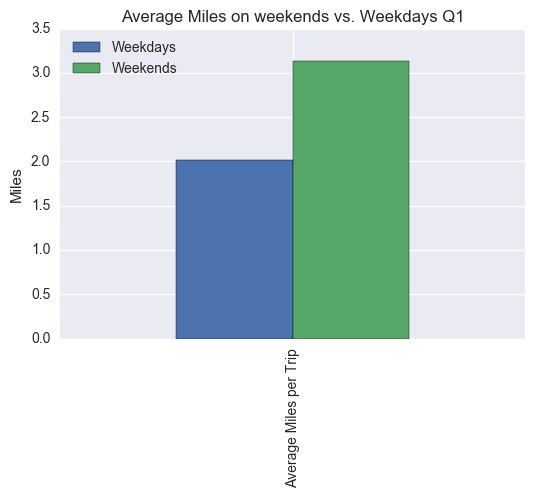

In [96]:
fig, ax = plt.subplots(1)
Average_Mileage.plot(ax=ax, kind = 'bar', title = 'Average Miles on weekends vs. Weekdays Q1')

ax.legend(['Weekdays', 'Weekends'], loc = 'best')
ax.set_ylabel('Miles') 
ax.set_ylim (0,3.5)

Another interesting comparison is between months. We would like to examine and compare the total number of miles traveled by CitiBike users in January, February, and March. A higher number of miles traveled in a given month would indicate more rentals and/or more miles traveled per use. Either way, there is a trend toward heavier bike usage.

Our hypothesis is that riders will ride their bikes more in the beginning of the year, because New Year’s resolutions will push people to ride a bike to work instead of taking the train or a cab. We also need to factor in the poor weather during this time of year, which may deter bike riders, but we think that there will be a spike in January and then a downward trend month to month.

In [97]:
January_Miles = CitiBike [CitiBike['Month'] == 1]
January_Miles_Total = January_Miles [['Total Miles']].sum ()

February_Miles = CitiBike [CitiBike['Month'] == 2]
February_Miles_Total = February_Miles [['Total Miles']].sum ()

March_Miles = CitiBike [CitiBike['Month'] == 3]
March_Miles_Total = March_Miles [['Total Miles']].sum ()

print (January_Miles_Total)
print (February_Miles_Total)
print (March_Miles_Total)


Total Miles    1606155
dtype: int64
Total Miles    1987764
dtype: int64
Total Miles    1724690
dtype: int64


In [98]:
Total_Mileage = pd.DataFrame ({'January' : January_Miles_Total, 
                               'February' : February_Miles_Total, 
                               'March' : March_Miles_Total})

Total_Mileage = Total_Mileage[['January', 'February', 'March']]

print (Total_Mileage)

             January  February    March
Total Miles  1606155   1987764  1724690


(0, 2100000)

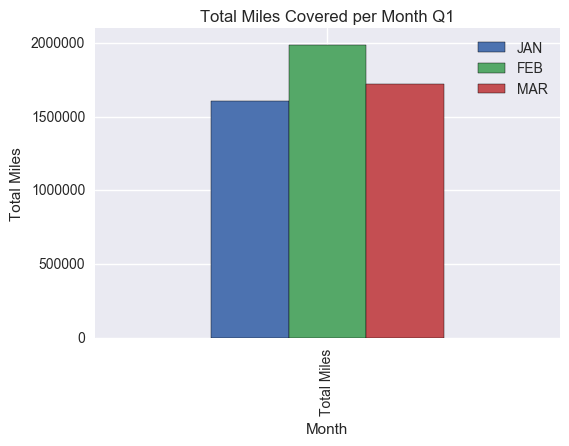

In [99]:
fig, ax = plt.subplots(1)
Total_Mileage.plot(ax=ax, kind = 'bar', title = 'Total Miles Covered per Month Q1')

ax.legend(['JAN', 'FEB', 'MAR'], loc='best')
ax.set_xlabel('Month')
ax.set_ylabel('Total Miles') 
ax.set_ylim (0,2100000)

Based on the analysis, total miles traveled was actually highest in February, disproving our original hypothesis. One theory for why this may be the case is that riders are on vacation in the beginning of February and, therefore, are not commuting to work. Alternatively, blizzards and poor weather may have kept them on the train and in cabs, or working from home. Finally, it could be the case that February had more opportunities for bike rides (perhaps this was popular on Valentine’s Day weekend as couples sought out activities to do together), or CitiBike ran a promotion for part of the month to encourage bike rentals.

Though we can’t claim this as a long-term trend to be expected every February, we recommend that CitiBike work to convert this spike in miles traveled to other months of the year. If this spike represents a flurry of one-time users, CitiBike has an opportunity to convert those users to longer-term users. For instance, they could offer 2 weeks of unlimited use free with the first rental, in order to demonstrate the benefit of CitiBike to users who enjoy riding bikes. This may help create a slightly stickier service for consumers, and would translate a spike in interest into longer term business benefits.

We want to get a bit more granular in our analysis and look into which days are most popular for CitiBike in New York City. In order to do this, we will first create individual data frames for each day of the week in order to average usage.

In [100]:
# Monday
Monday_Data = CitiBike [CitiBike['Day of Week'] == 'Monday']
Monday_Miles = Monday_Data[['Average Miles per Trip']].mean ()

# Tuesday
Tuesday_Data = CitiBike [CitiBike['Day of Week'] == 'Tuesday']
Tuesday_Miles = Tuesday_Data[['Average Miles per Trip']].mean ()

# Wednesday
Wednesday_Data = CitiBike [CitiBike['Day of Week'] == 'Wednesday']
Wednesday_Miles = Wednesday_Data[['Average Miles per Trip']].mean ()

# Thursday
Thursday_Data = CitiBike [CitiBike['Day of Week'] == 'Thursday']
Thursday_Miles = Thursday_Data[['Average Miles per Trip']].mean ()

# Friday
Friday_Data = CitiBike [CitiBike['Day of Week'] == 'Friday']
Friday_Miles = Friday_Data[['Average Miles per Trip']].mean ()

# Saturday
Saturday_Data = CitiBike [CitiBike['Day of Week'] == 'Saturday']
Saturday_Miles = Saturday_Data[['Average Miles per Trip']].mean ()

# Sunday
Sunday_Data = CitiBike [CitiBike['Day of Week'] == 'Sunday']
Sunday_Miles = Sunday_Data[['Average Miles per Trip']].mean ()


print (Monday_Miles)    # to confirm that code is working as intended and returning desired results


Average Miles per Trip    2.283336
dtype: float64


We now use the values above to create a dataframe that we can use to plot daily average miles by the day of the week.

In [101]:
Weekday_Daily_Mileage = pd.DataFrame ({'Monday' : Monday_Miles, 
                                       'Tuesday' : Tuesday_Miles, 
                                       'Wednesday' : Wednesday_Miles, 
                                       'Thursday' : Thursday_Miles, 
                                       'Friday' : Friday_Miles})


Weekend_Daily_Mileage = pd.DataFrame ({'Saturday' : Saturday_Miles, 
                                       'Sunday' : Sunday_Miles}) 


Weekday_Daily_Mileage = Weekday_Daily_Mileage[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']]

Weekend_Daily_Mileage = Weekend_Daily_Mileage[['Saturday', 'Sunday']]

print (Weekday_Daily_Mileage)
print (Weekend_Daily_Mileage)

Weekday_Daily_Mileage.head ()


                          Monday  Tuesday  Wednesday  Thursday    Friday
Average Miles per Trip  2.283336  2.24034   2.126203   2.13195  2.582596
                        Saturday    Sunday
Average Miles per Trip   3.17814  3.100322


,Monday,Tuesday,Wednesday,Thursday,Friday
Average Miles per Trip,2.283336,2.24034,2.126203,2.13195,2.582596


The analysis shows a steady downward trend throughout the week – riders are much more likely to rent a CitiBike on Monday than on Thursday. This is fairly logical. It’s easy to imagine that riders are energized on Monday after a relaxing weekend, and tired, busy, and distracted later in the week. This means that they have more energy and are more willing to ride a bike to work at the beginning of the week. Only those who are going short distances want to ride a bike.

However, there is a considerable spike on Fridays, up to more than 2.5 miles travelled by the average CitiBike rider. This could represent a number of things, but it is certainly related to the impending weekend. Riders are energized by the end of the week, and may bike more at the end of the day because they have the free time. Alternatively, riders may be working from home and going for longer rides during a break in the middle of the day.

(0, 3.0)

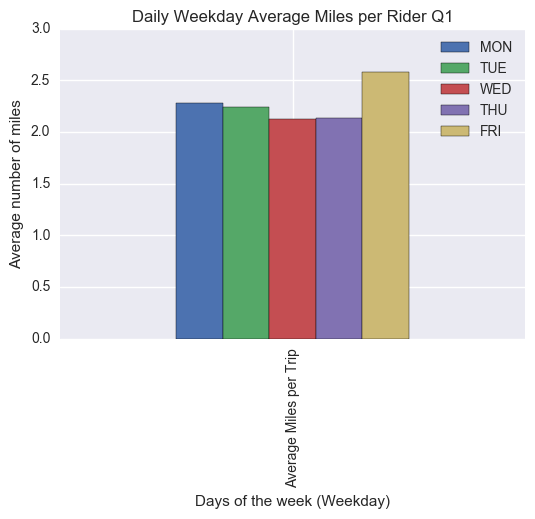

In [102]:
fig, ax = plt.subplots(1)
Weekday_Daily_Mileage.plot(ax=ax, kind = 'bar', title = 'Daily Weekday Average Miles per Rider Q1')

ax.legend(['MON', 'TUE', 'WED', 'THU', 'FRI'], loc='best')
ax.set_xlabel('Days of the week (Weekday)')
ax.set_ylabel('Average number of miles') 
ax.set_ylim (0,3.0)



We already know that weekend riders travel much farther than weekday riders, but we anticipated that there would be some difference in Saturday vs. Sunday usage. Instead, data on average miles per trip was almost identical between the two days. Sunday is marginally higher, but it is fair to conclude that weekend travel distance is split evenly across Saturday and Sunday.

(0, 3.5)

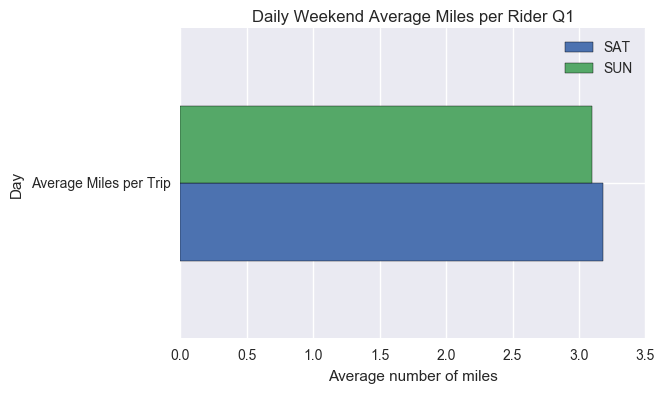

In [103]:
fig, ax = plt.subplots(1)
Weekend_Daily_Mileage.plot(ax=ax, 
                           kind = 'barh', 
                           title = 'Daily Weekend Average Miles per Rider Q1')

ax.legend(['SAT', 'SUN'], loc='best')
ax.set_ylabel('Day')
ax.set_xlabel('Average number of miles') 
ax.set_xlim (0,3.5)
